- Importing the necessary Libraries in the notebook

In [422]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Task 1 -- Data Cleaning
- loading the dataset from the uploaded csv file and display first 10 datas

In [444]:
#loading the data from the csv file
data = pd.read_csv('data/amazon.csv')
df = pd.DataFrame(data)
pd.set_option('display.width', 50) 
df.head(10).reset_index() #head function is used for the display of first 10 data

,index,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN

- Check for any missing values in the dataset. If there are any, handle them
appropriately

In [424]:
df.isnull().sum()
#Here from the output, we see that 2 rating count values are Null so we'll fill them with 0

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [425]:
#Here what i did, I filled the null values of rating count to 0 and displayed again
df.fillna(0, inplace=True)#inplace will make the changes in the actual dataframe
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

- Ensure all price-related columns (`discountedprice`, `actualprice`) are in numeric
format and handle any inconsistencies found.

In [426]:
#Here to remove both $ and , from the price, we use replace function. then after replacing
#we convert it into numeric (replacing , is important to convert)
df['discounted_price'] = (df['discounted_price'].str.replace('₹', '')).str.replace(',', '')
df['discounted_price'] = pd.to_numeric(df['discounted_price'])
df['discounted_price']

0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

In [427]:
#Similarly converting the actual price column
df['actual_price'] = (df['actual_price'].str.replace('₹', '')).str.replace(',', '')
df['actual_price'] = pd.to_numeric(df['actual_price'])
df['actual_price']

0       1099.0
1        349.0
2       1899.0
3        699.0
4        399.0
         ...  
1460     919.0
1461    3045.0
1462    3080.0
1463    1890.0
1464    3690.0
Name: actual_price, Length: 1465, dtype: float64

- Verify that the `rating` column is in a numeric format and handle non-numeric values
if any

In [428]:
#First checking if there is any null value in the column
df['rating'].isnull().sum()

0

In [429]:
#2. Converting the rating value to the numeric value
#Here we've on our dataset the symbol | . so replacing this symbol to '0'
df['rating'] = df['rating'].str.replace('|', '0')
df['rating'] = pd.to_numeric(df['rating'])
df['rating']

0       4.2
1       4.0
2       3.9
3       4.2
4       4.2
       ... 
1460    4.0
1461    4.1
1462    3.6
1463    4.0
1464    4.3
Name: rating, Length: 1465, dtype: float64

2. Data Transformation

- Calculate the amount of discount in currency for each product and add it as a new
column `discount_amount`.

In [442]:
#adding a column in dataset named discount_amount.
df['discount_amount'] = df['actual_price'] - df['discounted_price']
df['discount_amount'] #column in the end of dataframe
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,discount_amount,review_length,avg_rating
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.00,1099.0,64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1,700.00,60,16.565870
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,199.00,349.0,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Place

Create a new column `reviewlength` that contains the number of words in the
`reviewcontent`.

In [431]:
#Here we are applying the apply function that'll return the number of words in the review
def count_words(string):
    return len(string.split(' '))
df['review_length'] = df['review_content'].apply(lambda x: count_words(x))
df['review_length'].reset_index()

,index,review_length
0,0,60
1,1,201
2,2,13
3,3,77
4,4,415
...,...,...
1460,1460,77
1461,1461,180
1462,1462,151
1463,1463,51


3. Data Analysis & Visualization

- Identify the top 10 most reviewed products.

In [432]:
#showing name of 10 product after arranging them in descending order based on reviews
new_df = df.sort_values('review_length', ascending=False)
new_df[['product_name', 'review_length']].head(10).reset_index()

,index,product_name,review_length
0,1056,Philips GC1905 1440-Watt Steam Iron with Spray (Blue),3014
1,656,"Boult Audio Probass Curve Bluetooth Wireless in Ear Earphones with Mic with Ipx5 Water Resistant, 12H Battery Life & Extra Bass (Black)",2399
2,718,SanDisk Ultra Dual 64 GB USB 3.0 OTG Pen Drive (Black),2346
3,41,Mi 108 cm (43 inches) Full HD Android LED TV 4C | L43M6-INC (Black),2172
4,976,"Xiaomi Pad 5| Qualcomm Snapdragon 860| 120Hz Refresh Rate| 6GB, 128GB| 2.5K+ Display (10.95-inch/27.81cm)|1 Billion Colours| Dolby Vision Atmos| Quad Speakers| Wi-Fi| Gray",2085
5,420,"boAt Xtend Smartwatch with Alexa Built-in, 1.69” HD Display, Multiple Watch Faces, Stress Monitor, Heart & SpO2 Monitoring, 14 Sports Modes, Sleep Monitor, 5 ATM & 7 Days Battery(Pitch Black)",2027
6,677,"boAt Xtend Smartwatch with Alexa Built-in, 1.69” HD Display, Multiple Watch Faces, Stress Monitor, Heart & SpO2 Monitoring, 14 Sports Modes, Sleep Monitor, 5 ATM & 7 Days Battery(Pitch Black)",2027
7,568,"Samsung Galaxy S20 FE 5G (Cloud Navy, 8GB RAM, 128GB Storage) with No Cost EMI & Additional Exchange Offers",1931
8,777,"APC Back-UPS BX600C-IN 600VA / 360W, 230V, UPS System, an Ideal Power Backup & Protection for Home Office, Desktop PC & Home Electronics",1893
9,691,"TP-Link USB Bluetooth Adapter for PC, 5.0 Bluetooth Dongle Receiver (UB500) Supports Windows 11/10/8.1/7 for Desktop, Laptop, Mouse, Keyboard, Printers, Headsets, Speakers, PS4/ Xbox Controllers",1875


- Determine the top 5 categories with the highest average rating.

In [433]:
#Here first we are sorting the values based on the ratings in descending order
# then taking out the product name and rating from that column
#then taking top 5 values from it.
df.sort_values('rating', ascending=False)[['product_name', 'rating']].head(5).reset_index()

,index,product_name,rating
0,324,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0
1,174,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0
2,775,"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0
3,1145,"Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.8
4,1201,"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.8


- Create a histogram showing the distribution of ratings across all products.

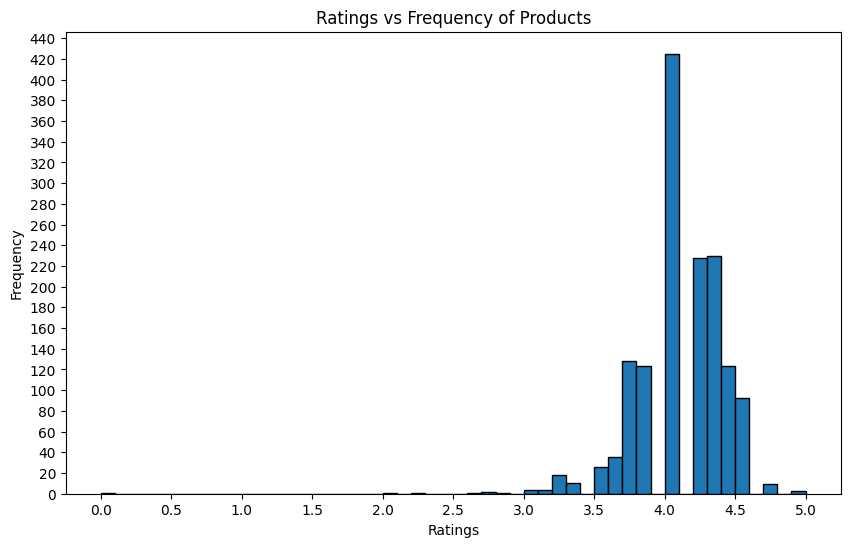

In [434]:
# Extracting ratings and product names from the DataFrame
data_rating = df['rating']
products = df['product_name'].str.split(' ')

# Plotting the histogram
plt.figure(figsize=(10,6))  # Set the figure size
plt.hist(data_rating, bins=50, edgecolor='black')  # Plotting the histogram with 50 bins and black edges
plt.xlabel('Ratings')  # Labeling the x-axis
plt.xticks(np.arange(0, 5.1, 0.5))  # Setting ticks for the x-axis from 0 to 5 with a step of 0.5
plt.yticks(np.arange(0, 450, 20))  # Setting ticks for the y-axis from 0 to 450 with a step of 20
plt.ylabel('Frequency')  # Labeling the y-axis
plt.title('Ratings vs Frequency of Products')  # Setting the title of the plot
plt.show()  # Displaying the plot


4. Insightful Analytics

- Calculate the average rating per user and identify the top 5 users who have given
the highest average ratings.

In [435]:
df.head(1)
#average rating per user == rating_count / length of (user_name)
# then to calculate the username top 5, we take out the user name and split them by ,
df['avg_rating'] = pd.to_numeric(df['rating_count'].str.replace(',', '')) / len(df['user_name'])
new_data = df[['avg_rating', 'user_name']].sort_values(ascending=False, by='avg_rating')
top_user_names = new_data['user_name'].str.split(',')
# here taking out the top 5 people name from the top average rating column
top = pd.DataFrame(top_user_names[0][:5]).reset_index()
top['index'] = ['I', 'II', "III", 'IV', 'V']
top

,index,0
0,I,Manav
1,II,Adarsh gupta
2,III,Sundeep
3,IV,S.Sayeed Ahmed
4,V,jaspreet singh


- Analyze the relationship between `discount_percentage` and the average `rating` for
a product. Is there any visible trend?

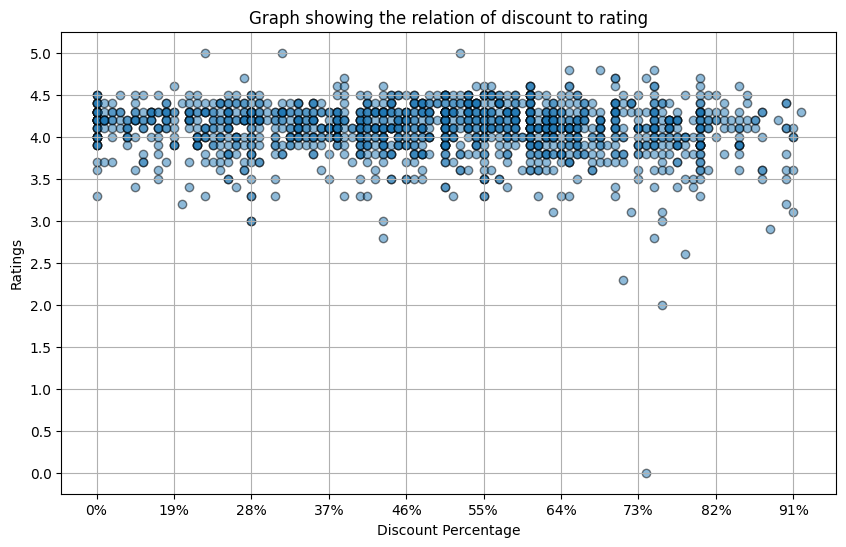

In [436]:
# Create a scatter plot to visualize the relationship between discount percentage and ratings of products
plt.figure(figsize=(10, 6))
plt.scatter(df['discount_percentage'].sort_values(ascending=True), df['rating'], alpha=0.5, marker='o', edgecolor='black')

# Set x-axis ticks to range from 0 to 100 with a step size of 10
plt.xticks(range(0, 100, 10))

# Set y-axis ticks to range from 0 to 5 with a step size of 0.5
plt.yticks(np.arange(0, 5.1, 0.5))

# Define marker sizes for the scatter plot
sizes = [50, 100, 150, 200, 250]  

# Display gridlines on the plot
plt.grid(True)

# Set labels for x-axis and y-axis
plt.xlabel('Discount Percentage')
plt.ylabel('Ratings')

# Set title for the plot
plt.title("Graph showing the relation of discount to rating")

# Display the plot
plt.show()

- Trend in above chart is that the products with ratings betweenn 4 and 5 got the discount

- For each category, calculate the average `discountedprice` and compare it to the
average `actualprice`. Which category has the highest average discount in terms of
currency?

In [437]:
# Calculating the average discounted price and sorting it based on the same.
df_category = df.groupby('category')[['discounted_price', 'actual_price']].mean().reset_index()
df_category.sort_values(ascending=False, by='discounted_price')

,category,discounted_price,actual_price
126,"Home&Kitchen|Heating,Cooling&AirQuality|AirConditioners|Split-SystemAirConditioners",42990.000000,75990.00000
43,Computers&Accessories|Laptops|TraditionalLaptops,37247.000000,59890.00000
57,Computers&Accessories|Tablets,26999.000000,37999.00000
97,"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",24840.190476,40132.84127
188,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|RoboticVacuums",23449.500000,44949.50000
...,...,...,...
6,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors,99.000000,999.00000
204,"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|BottledInk",95.000000,100.00000
122,Home&Kitchen|CraftMaterials|DrawingMaterials|DrawingMedia|Pens,90.000000,100.00000
110,Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts,89.000000,499.00000


In [451]:
#  Which category has the highest average discount in terms of currency?
df_category[['category','discounted_price']].head(1)

,category,discounted_price
0,Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,2339.0


5. Report Generation

- Total number of reviews
- Average rating across all products
- Product with the most reviews
- Category with the highest average discount
- Export this report to a CSV file named 'amazonproductsummary.csv'.

In [ ]:
df.head(1)
total_reviews = len(df)
average_rating = df['rating'].mean()
most_reviews_product = df['product_name'].value_counts().idxmax()
highest_discount_category = df.groupby('category')['discounted_price'].mean().idxmax()

# Create a DataFrame for the summary report
summary_report = pd.DataFrame({
    'Total Reviews': [total_reviews],
    'Average Rating': [average_rating],
    'Product with Most Reviews': [most_reviews_product],
    'Category with Highest Avg. Discount': [highest_discount_category]
})
summary_report.to_csv('summary_report.csv', index=False)

- reading the data from the file

In [458]:
# reading the csv to show the dataset
data = pd.read_csv('summary_report.csv')
data

,Total Reviews,Average Rating,Product with Most Reviews,Category with Highest Avg. Discount
0,1465,4.093788,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution","Home&Kitchen|Heating,Cooling&AirQuality|AirConditioners|Split-SystemAirConditioners"
